## MALIS SEMESTER PROJECT


In [1]:
%config Completer.use_jedi = False  
import numpy as np    
import pandas as pd    
import matplotlib.pyplot as plt    
from sklearn.preprocessing import PolynomialFeatures    
from sklearn.metrics import mean_squared_error   
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",15)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold


from sklearn.metrics import log_loss

Fontconfig error: Cannot load default config file: No such file: (null)


In [2]:
df = pd.read_csv ('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df=df.drop(labels=['ChestPainType', 'ST_Slope','RestingECG','Oldpeak','Cholesterol'], axis=1) 
df.head()

,Age,Sex,RestingBP,FastingBS,MaxHR,ExerciseAngina,HeartDisease
0,40,M,140,0,172,N,0
1,49,F,160,0,156,N,1
2,37,M,130,0,98,N,0
3,48,F,138,0,108,Y,1
4,54,M,150,0,122,N,0


In [4]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

## Simple Analysis

In [5]:
df.loc[df['RestingBP'] == 0]


,Age,Sex,RestingBP,FastingBS,MaxHR,ExerciseAngina,HeartDisease
449,55,M,0,0,155,N,1


In [6]:
df.drop([449], axis=0, inplace=True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,917.0,53.509269,9.437636,28.0,47.0,54.0,60.0,77.0
RestingBP,917.0,132.540894,17.999749,80.0,120.0,130.0,140.0,200.0
FastingBS,917.0,0.233370,0.423206,0.0,0.0,0.0,0.0,1.0
MaxHR,917.0,136.789531,25.467129,60.0,120.0,138.0,156.0,202.0
HeartDisease,917.0,0.552890,0.497466,0.0,0.0,1.0,1.0,1.0


In [8]:
df.corr()

,Age,RestingBP,FastingBS,MaxHR,HeartDisease
Age,1.000000,0.263084,0.198170,-0.382280,0.282012
RestingBP,0.263084,1.000000,0.067823,-0.109693,0.117990
FastingBS,0.198170,0.067823,1.000000,-0.131067,0.267994
MaxHR,-0.382280,-0.109693,-0.131067,1.000000,-0.401410
HeartDisease,0.282012,0.117990,0.267994,-0.401410,1.000000


Text(0.5, 1.0, 'We have similar samples size')

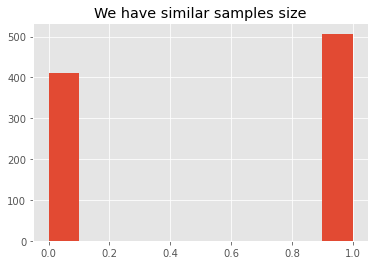

In [9]:
plt.hist(df['HeartDisease']) 
plt.title("We have similar samples size")

M    724
F    193
Name: Sex, dtype: Int64


(array([724.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 193.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

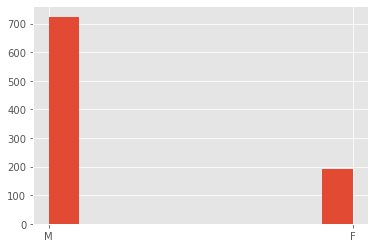

In [10]:
print(df['Sex'].value_counts())
plt.hist(df['Sex']) 


(array([ 12.,  37.,  86., 104., 148., 200., 175., 101.,  39.,  15.]),
 array([28. , 32.9, 37.8, 42.7, 47.6, 52.5, 57.4, 62.3, 67.2, 72.1, 77. ]),
 <BarContainer object of 10 artists>)

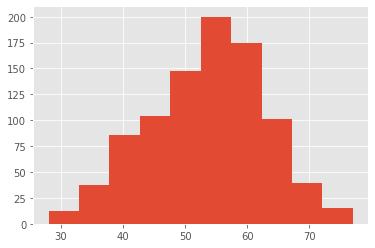

In [11]:
plt.hist(df['Age']) 

### Preprocessing

* We have to convert Sex and ExerciseAngina categorical features to numbers first for that purpose we can use LabelEncoder from sklearn


In [12]:

df=pd.get_dummies(df,columns=["Sex","ExerciseAngina"],drop_first=False)

In [13]:
df.head()

,Age,RestingBP,FastingBS,MaxHR,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
0,40,140,0,172,0,0,1,1,0
1,49,160,0,156,1,1,0,1,0
2,37,130,0,98,0,0,1,1,0
3,48,138,0,108,1,1,0,0,1
4,54,150,0,122,0,0,1,1,0


In [14]:
df.corr()

,Age,RestingBP,FastingBS,MaxHR,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y
Age,1.000000,0.263084,0.198170,-0.382280,0.282012,-0.055670,0.055670,-0.216017,0.216017
RestingBP,0.263084,1.000000,0.067823,-0.109693,0.117990,-0.009427,0.009427,-0.153064,0.153064
FastingBS,0.198170,0.067823,1.000000,-0.131067,0.267994,-0.120424,0.120424,-0.059988,0.059988
MaxHR,-0.382280,-0.109693,-0.131067,1.000000,-0.401410,0.189668,-0.189668,0.370023,-0.370023
HeartDisease,0.282012,0.117990,0.267994,-0.401410,1.000000,-0.305118,0.305118,-0.495490,0.495490
Sex_F,-0.055670,-0.009427,-0.120424,0.189668,-0.305118,1.000000,-1.000000,0.191226,-0.191226
Sex_M,0.055670,0.009427,0.120424,-0.189668,0.305118,-1.000000,1.000000,-0.191226,0.191226
ExerciseAngina_N,-0.216017,-0.153064,-0.059988,0.370023,-0.495490,0.191226,-0.191226,1.000000,-1.000000
ExerciseAngina_Y,0.216017,0.153064,0.059988,-0.370023,0.495490,-0.191226,0.191226,-1.000000,1.000000


In [15]:
y=df['HeartDisease'].to_numpy()
X=df.drop(columns='HeartDisease',axis=1)
X=X.to_numpy().reshape(917,-1)

In [15]:
from sklearn.model_selection import KFold

from sklearn.model_selection import KFold

## Logistic regression with KFold Cross Validation

In [16]:
X_TR, X_TEST, y_TR, y_TEST = train_test_split( X, y, test_size=0.33, random_state=42)

k, shuffle, seed = 5, True, 42
kfold = KFold(n_splits=k, shuffle=shuffle, random_state=seed)


C=[0.0001, 0.001,0.01,0.1,1,10,100,1000,10000,100000]
for c in C:
    

    tr_errors = [] 
    val_errors = []
    tr_loss=[] 
    val_loss=[]

    for j, (train_indices, val_indices) in enumerate(kfold.split(X_TR)): 

        X_train, y_train, X_val, y_val = X[train_indices], y[train_indices], X[val_indices], y[val_indices]

       
        #scale
        ro_scaler=MinMaxScaler()
        X_train=ro_scaler.fit_transform(X_train)
        X_val=ro_scaler.transform(X_val)
        
        #train
        clf = LogisticRegression(C=c)    
        clf.fit(X_train,y_train)

        #predict and accuracy score
        y_pred_train=clf.predict(X_train)
        acc_train=accuracy_score(y_train,y_pred_train)
        y_pred_val=clf.predict(X_val)
        acc_val=accuracy_score(y_val,y_pred_val)
        
        #loss calculation 
        loss_train=log_loss(y_train,y_pred_train)
        loss_val=log_loss(y_val,y_pred_val)   



        val_loss.append(loss_val)
        tr_loss.append(loss_train)
        tr_errors.append(acc_train)
        val_errors.append(acc_val)
        


    #Average accuracy score and loss over K fold
    average_train_error = np.mean(tr_errors)
    average_val_error = np.mean(val_errors)
    average_val_loss=np.mean(val_loss)
    average_tr_loss=np.mean(tr_loss)
    print("\n\nTRIAL C="+str(c)+" \n")
    print(f" avg train accuracy = {average_train_error:.5f}, "
              f"avg val accuracy = {average_val_error:.5f}")
    print(f" avg train loss = {average_tr_loss:.5f}, "
              f"avg val loss = {average_val_loss:.5f}")
    
    



TRIAL C=0.0001 

 avg train accuracy = 0.59935, avg val accuracy = 0.59931
 avg train loss = 13.83842, avg val loss = 13.83977


TRIAL C=0.001 

 avg train accuracy = 0.59935, avg val accuracy = 0.59931
 avg train loss = 13.83842, avg val loss = 13.83977


TRIAL C=0.01 

 avg train accuracy = 0.73209, avg val accuracy = 0.70844
 avg train loss = 9.25331, avg val loss = 10.07045


TRIAL C=0.1 

 avg train accuracy = 0.82288, avg val accuracy = 0.82246
 avg train loss = 6.11751, avg val loss = 6.13215


TRIAL C=1 

 avg train accuracy = 0.82370, avg val accuracy = 0.82246
 avg train loss = 6.08940, avg val loss = 6.13215


TRIAL C=10 

 avg train accuracy = 0.82654, avg val accuracy = 0.81758
 avg train loss = 5.99100, avg val loss = 6.30064


TRIAL C=100 

 avg train accuracy = 0.82695, avg val accuracy = 0.81595
 avg train loss = 5.97696, avg val loss = 6.35680


TRIAL C=1000 

 avg train accuracy = 0.82695, avg val accuracy = 0.81595
 avg train loss = 5.97696, avg val loss = 6.35680

## Loss, Accuracy and other scores analysis

In [19]:

ro_scaler=MinMaxScaler()
X_TR=ro_scaler.fit_transform(X_TR)
X_TEST=ro_scaler.transform(X_TEST)
clf_1=LogisticRegression(C=1)   
clf_1=clf_1.fit(X_TR,y_TR)       
y_train_pred=clf_1.predict(X_TR)
y_val_pred=clf_1.predict(X_TEST)
accuracy=accuracy_score(y_TEST,y_val_pred) 
accuracy

0.7986798679867987

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

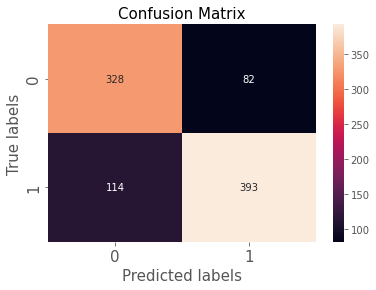

In [20]:
X_scaled=ro_scaler.fit_transform(X)
y_pred=clf_1.predict(X_scaled)
conf_mat=confusion_matrix(y,y_pred) 
ax= plt.subplot()

sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=15)
ax.xaxis.set_ticklabels(['0', '1'],fontsize=15)
ax.yaxis.set_ticklabels(['0', '1'],fontsize=15)

In [21]:
TN=conf_mat[0][0]
TP=conf_mat[1][1]
FP=conf_mat[0][1]
FN=conf_mat[1][0]

In [22]:
Accuracy=(TN+TP)/(TN+TP+FP+FN)
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
F1=2*(Precision*Recall)/(Precision+Recall)

In [23]:
print("Accuracy is " , Accuracy , "\nPrecision is ", Precision, "\nRecall is" , Recall, "\nF1 is ",  F1, sep=" ")

Accuracy is  0.7862595419847328 
Precision is  0.8273684210526315 
Recall is 0.7751479289940828 
F1 is  0.80040733197556


## SVM ( Support Vector Classification)

In [24]:
from sklearn.svm import SVC

In [25]:
X_TR, X_TEST, y_TR, y_TEST = train_test_split( X, y, test_size=0.33, random_state=42)


k, shuffle, seed = 5, True, 42
kfold = KFold(n_splits=k, shuffle=shuffle, random_state=seed)

C=[0.0001, 0.001,0.01,0.1,1,10,100,1000,10000,100000]
for c in C:


    tr_errors = []
    val_errors = []
    tr_loss=[] 
    val_loss=[]

    for j, (train_indices, val_indices) in enumerate(kfold.split(X_TR)): 

        X_train, y_train, X_val, y_val = X[train_indices], y[train_indices], X[val_indices], y[val_indices]


        clf=SVC(kernel="rbf",C=c)

        ro_scaler=MinMaxScaler()
        X_train=ro_scaler.fit_transform(X_train)
        X_val=ro_scaler.transform(X_val)
        clf.fit(X_train,y_train)


        y_pred_train=clf.predict(X_train)
        acc_train=accuracy_score(y_train,y_pred_train)


        y_pred_val=clf.predict(X_val)
        acc_val=accuracy_score(y_val,y_pred_val)
        loss_train=log_loss(y_train,y_pred_train)
        loss_val=log_loss(y_val,y_pred_val)   


        val_loss.append(loss_val)
        tr_loss.append(loss_train)
        tr_errors.append(acc_train)
        val_errors.append(acc_val)
        #print(f'\nCV iteration = {j}\nTraining Accuracy = {acc_train:.5}\nValidation Accuracy = {acc_val:.5}')  
        
    #Average accuracy score and loss over K fold
    average_train_error = np.mean(tr_errors)
    average_val_error = np.mean(val_errors)
    average_val_loss=np.mean(val_loss)
    average_tr_loss=np.mean(tr_loss)
    print("\n\nTRIAL C="+str(c)+" \n")
    print(f" avg train accuracy = {average_train_error:.5f}, "
              f"avg val accuracy = {average_val_error:.5f}")
    print(f" avg train loss = {average_tr_loss:.5f}, "
              f"avg val loss = {average_val_loss:.5f}")






TRIAL C=0.0001 

 avg train accuracy = 0.59935, avg val accuracy = 0.59931
 avg train loss = 13.83842, avg val loss = 13.83977


TRIAL C=0.001 

 avg train accuracy = 0.59935, avg val accuracy = 0.59931
 avg train loss = 13.83842, avg val loss = 13.83977


TRIAL C=0.01 

 avg train accuracy = 0.59935, avg val accuracy = 0.59931
 avg train loss = 13.83842, avg val loss = 13.83977


TRIAL C=0.1 

 avg train accuracy = 0.82899, avg val accuracy = 0.82896
 avg train loss = 5.90659, avg val loss = 5.90751


TRIAL C=1 

 avg train accuracy = 0.83103, avg val accuracy = 0.81758
 avg train loss = 5.83625, avg val loss = 6.30064


TRIAL C=10 

 avg train accuracy = 0.83387, avg val accuracy = 0.81758
 avg train loss = 5.73782, avg val loss = 6.30064


TRIAL C=100 

 avg train accuracy = 0.84609, avg val accuracy = 0.81594
 avg train loss = 5.31592, avg val loss = 6.35726


TRIAL C=1000 

 avg train accuracy = 0.86727, avg val accuracy = 0.80458
 avg train loss = 4.58450, avg val loss = 6.7494

## Loss, Accuracy and other scores analysis

In [37]:
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.33, random_state=42)
ro_scaler=MinMaxScaler()
X_TR=ro_scaler.fit_transform(X_TR)
X_TEST=ro_scaler.transform(X_TEST)
clf_1=SVC(kernel="rbf",C=0.1)
clf_1=clf_1.fit(X_TR,y_TR)       
y_train_pred=clf_1.predict(X_TR)
y_val_pred=clf_1.predict(X_TEST)
accuracy=accuracy_score(y_TEST,y_val_pred) 
accuracy

0.7986798679867987

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

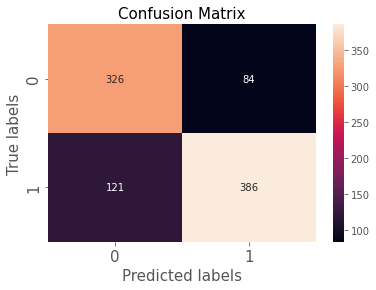

In [38]:

y_pred=clf_1.predict(X_scaled)
conf_mat=confusion_matrix(y,y_pred) 
ax= plt.subplot()

sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=15)
ax.xaxis.set_ticklabels(['0', '1'],fontsize=15)
ax.yaxis.set_ticklabels(['0', '1'],fontsize=15)

In [39]:
TN=conf_mat[0][0]
TP=conf_mat[1][1]
FP=conf_mat[0][1]
FN=conf_mat[1][0]

In [40]:
Accuracy=(TN+TP)/(TN+TP+FP+FN)
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
F1=2*(Precision*Recall)/(Precision+Recall)

In [41]:
print("Accuracy is " , Accuracy , "\nPrecision is ", Precision, "\nRecall is" , Recall, "\nF1 is ",  F1, sep=" ")

Accuracy is  0.7764449291166848 
Precision is  0.8212765957446808 
Recall is 0.7613412228796844 
F1 is  0.790174002047083


## KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

X_TR, X_TEST, y_TR, y_TEST = train_test_split( X, y, test_size=0.33, random_state=42)


k, shuffle, seed = 5, True, 42
kfold = KFold(n_splits=k, shuffle=shuffle, random_state=seed)

K=range(1,15)
for n_neighbor in K:


    tr_errors = []
    val_errors = []
    tr_loss=[] 
    val_loss=[]

    for j, (train_indices, val_indices) in enumerate(kfold.split(X_TR)): 

        X_train, y_train, X_val, y_val = X[train_indices], y[train_indices], X[val_indices], y[val_indices]


        clf=KNeighborsClassifier(n_neighbors=n_neighbor)


        ro_scaler=MinMaxScaler()
        X_train=ro_scaler.fit_transform(X_train)
        X_val=ro_scaler.transform(X_val)
        clf.fit(X_train,y_train)


        y_pred_train=clf.predict(X_train)
        acc_train=accuracy_score(y_train,y_pred_train)


        y_pred_val=clf.predict(X_val)
        acc_val=accuracy_score(y_val,y_pred_val)
        loss_train=log_loss(y_train,y_pred_train)
        loss_val=log_loss(y_val,y_pred_val)   


        val_loss.append(loss_val)
        tr_loss.append(loss_train)
        tr_errors.append(acc_train)
        val_errors.append(acc_val)
        
    #Average accuracy score and loss over K fold
    average_train_error = np.mean(tr_errors)
    average_val_error = np.mean(val_errors)
    average_val_loss=np.mean(val_loss)
    average_tr_loss=np.mean(tr_loss)
    print("\n\nTRIAL N_Nearestneigbours= "+str(n_neighbor)+" \n")
    print(f" avg train accuracy = {average_train_error:.5f}, "
              f"avg val accuracy = {average_val_error:.5f}")
    print(f" avg train loss = {average_tr_loss:.5f}, "
              f"avg val loss = {average_val_loss:.5f}")






TRIAL N_Nearestneigbours= 1 

 avg train accuracy = 1.00000, avg val accuracy = 0.74921
 avg train loss = 0.00000, avg val loss = 8.66219


TRIAL N_Nearestneigbours= 2 

 avg train accuracy = 0.86971, avg val accuracy = 0.74269
 avg train loss = 4.50008, avg val loss = 8.88724


TRIAL N_Nearestneigbours= 3 

 avg train accuracy = 0.86849, avg val accuracy = 0.78994
 avg train loss = 4.54217, avg val loss = 7.25539


TRIAL N_Nearestneigbours= 4 

 avg train accuracy = 0.85017, avg val accuracy = 0.78018
 avg train loss = 5.17502, avg val loss = 7.59233


TRIAL N_Nearestneigbours= 5 

 avg train accuracy = 0.85505, avg val accuracy = 0.80129
 avg train loss = 5.00642, avg val loss = 6.86318


TRIAL N_Nearestneigbours= 6 

 avg train accuracy = 0.84650, avg val accuracy = 0.79320
 avg train loss = 5.30171, avg val loss = 7.14259


TRIAL N_Nearestneigbours= 7 

 avg train accuracy = 0.84894, avg val accuracy = 0.79482
 avg train loss = 5.21750, avg val loss = 7.08690


TRIAL N_Nearestnei

In [60]:
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.33, random_state=42)
ro_scaler=MinMaxScaler()
X_TR=ro_scaler.fit_transform(X_TR)
X_TEST=ro_scaler.transform(X_TEST)
clf_1=KNeighborsClassifier(n_neighbors=5)
clf_1=clf_1.fit(X_TR,y_TR)       
y_train_pred=clf_1.predict(X_TR)
y_val_pred=clf_1.predict(X_TEST)
accuracy=accuracy_score(y_TEST,y_val_pred) 
accuracy

0.7491749174917491

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

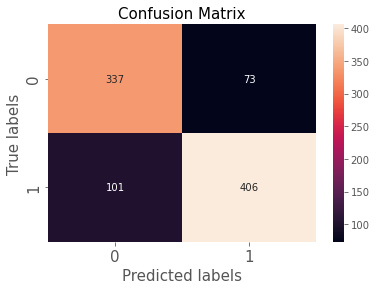

In [61]:

y_pred=clf_1.predict(X_scaled)
conf_mat=confusion_matrix(y,y_pred) 
ax= plt.subplot()

sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels',fontsize=15)
ax.set_ylabel('True labels',fontsize=15)
ax.set_title('Confusion Matrix',fontsize=15)
ax.xaxis.set_ticklabels(['0', '1'],fontsize=15)
ax.yaxis.set_ticklabels(['0', '1'],fontsize=15)

In [62]:
TN=conf_mat[0][0]
TP=conf_mat[1][1]
FP=conf_mat[0][1]
FN=conf_mat[1][0]

In [63]:
Accuracy=(TN+TP)/(TN+TP+FP+FN)
Precision=TP/(TP+FP)
Recall=TP/(TP+FN)
F1=2*(Precision*Recall)/(Precision+Recall)

In [64]:
print("Accuracy is " , Accuracy , "\nPrecision is ", Precision, "\nRecall is" , Recall, "\nF1 is ",  F1, sep=" ")

Accuracy is  0.8102508178844057 
Precision is  0.8475991649269311 
Recall is 0.8007889546351085 
F1 is  0.8235294117647058
